In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import spacy

In [14]:
file_path = 'Data/definitions_dataset/train.json'

with open(file_path, 'r', encoding='utf-8') as file:
    json_data_test = json.load(file)

flattened_data = [{'Word': sublist[0][0], 'Definition': ' '.join(sublist[1]), 'Context': ' '.join(sublist[2])}
                  for sublist in json_data_test]
df = pd.DataFrame(flattened_data)

In [15]:
df

,Word,Definition,Context
0,burnish,enhance or improve,in vain the communists tried to burnish their ...
1,sympathy,feelings of pity and sorrow for someone else '...,"well , as it happens , i have some sympathy wi..."
2,uttermost,the greatest possible degree,he tried his utmost
3,freeze-frame,the facility or process of stopping a film or ...,bray wears out every stylistic gimmick in his ...
4,base,the bottom or lowest part,the base of the mountain
...,...,...,...
98214,enter,used as a stage direction to indicate when a c...,"as they exit from the stage , enter three beau..."
98215,let,used as a way of expressing defiance or challenge,"if they want a challenge , let them clean up t..."
98216,lipoid,relating to or resembling fat .,it was only after 1929 that scientists could a...
98217,blunder,make one 's way clumsily or blindly,he fumbled towards the door


In [13]:
#total data points
98219 + 11782 + 12318

122319

In [19]:
df[df['Word'] == 'break']

,Word,Definition,Context
37,break,( tennis ) a score consisting of winning a gam...,he was up two breaks in the second set
337,break,cease an action temporarily,we pause for station identification
389,break,be broken in,"if the new teacher wo n't break , we 'll add s..."
502,break,"( of a vowel ) develop into a diphthong , unde...","in many ( but not all ) accents of english , a..."
806,break,destroy the power of ( a movement or organizat...,the bourgeoisie are agreed that the only solut...
...,...,...,...
95094,break,render inoperable or ineffective,you broke the alarm clock when you took it apa...
96133,break,cause a cut or graze in ( the skin ),"she punched the wall , breaking the skin on he..."
96328,break,vary or interrupt a uniformity or continuity,the flat plain was broken by tall mesas
96864,break,make or become inoperative,my wife is emphatic about having to wear a cer...


In [16]:
word_counts = Counter(df['Word'])

In [17]:
word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'frequency'])

/tmp/ipykernel_1746728/1720334963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='frequency', data=top_words, palette='viridis')


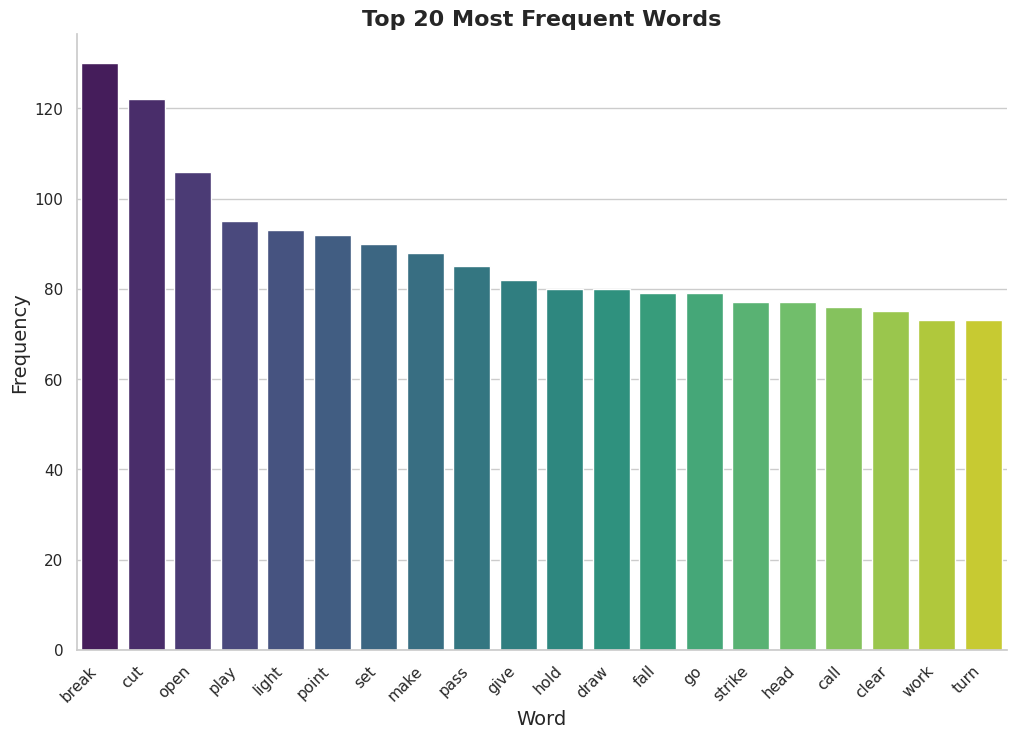

In [20]:
top_words = word_freq_df.nlargest(20, 'frequency')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='word', y='frequency', data=top_words, palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.title('Top 20 Most Frequent Words', fontsize=16, fontweight='bold')
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

sns.despine()

plt.show()

In [22]:
df['definition_length'] = df['Definition'].apply(len)

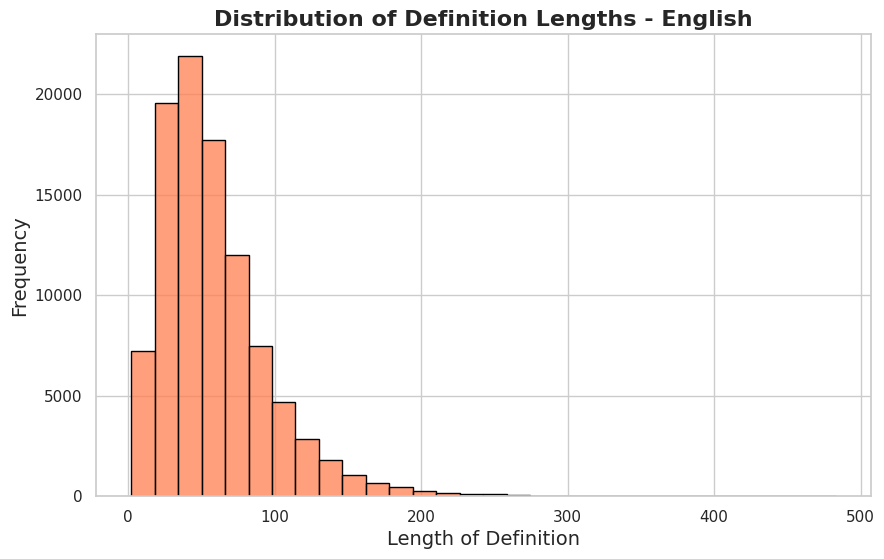

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['definition_length'], bins=30, color='coral', edgecolor='black')

plt.title('Distribution of Definition Lengths - English', fontsize=16, fontweight='bold')
plt.xlabel('Length of Definition', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('Results/english_def_length_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
df['example_length'] = df['Context'].apply(len)

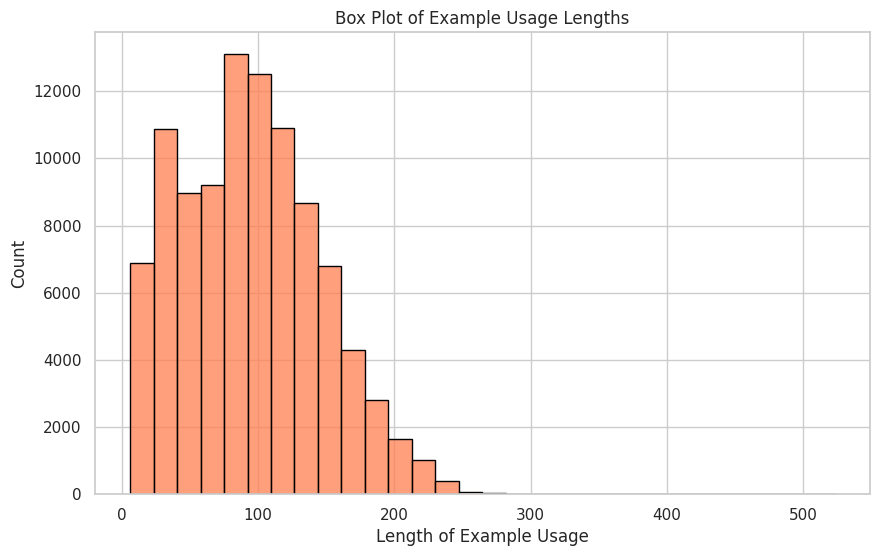

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['example_length'], bins=30, color='coral', edgecolor='black')
plt.title('Box Plot of Example Usage Lengths')
plt.xlabel('Length of Example Usage')
plt.savefig('Results/english_context_length_plot.png', dpi=300, bbox_inches='tight')
plt.show()

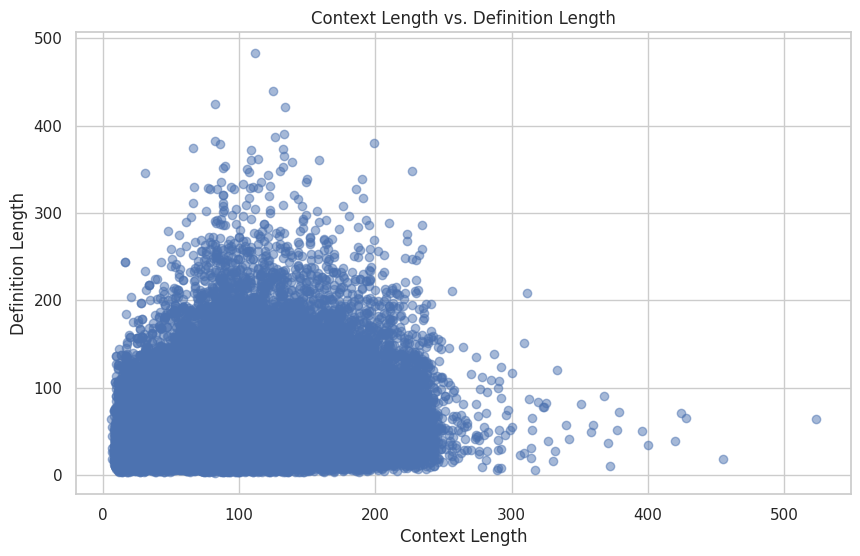

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['example_length'], df['definition_length'], alpha=0.5)
plt.title('Context Length vs. Definition Length')
plt.xlabel('Context Length')
plt.ylabel('Definition Length')
plt.savefig('Results/length_corr.png', dpi=300, bbox_inches='tight')
plt.show()

[nltk_data] Downloading package punkt to /home/tanmay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tanmay/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


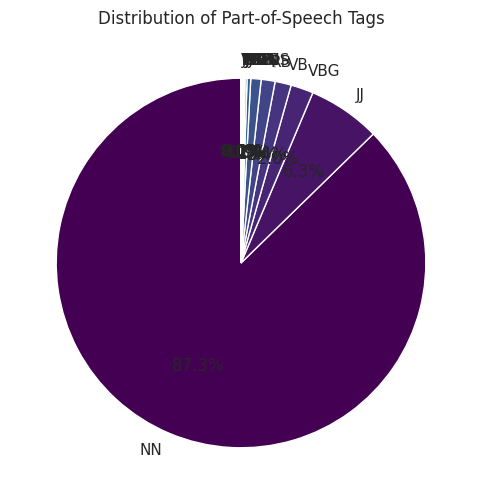

In [35]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
df['pos'] = df['Word'].apply(lambda x: pos_tag(word_tokenize(x))[0][1])
pos_counts = df['pos'].value_counts()

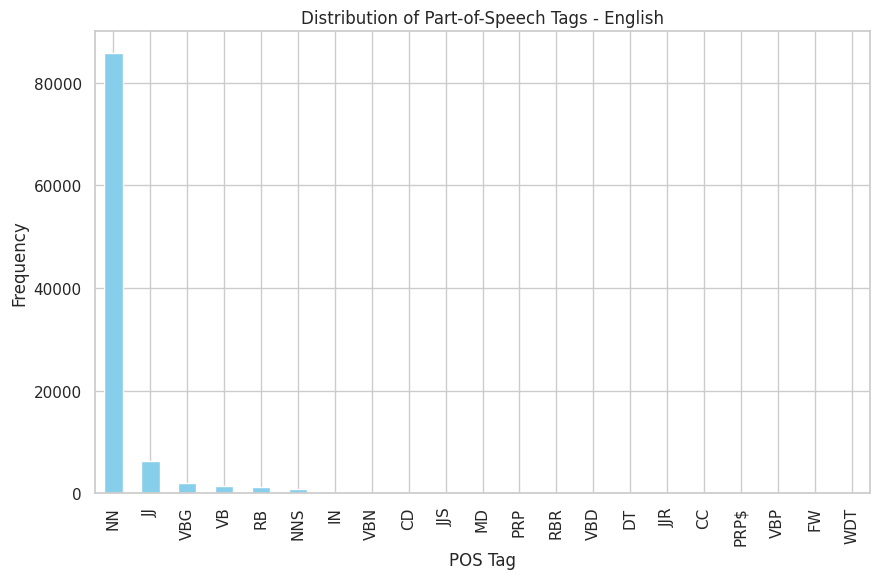

In [37]:
plt.figure(figsize=(10, 6))
pos_counts.plot.bar(color='skyblue')
plt.title('Distribution of Part-of-Speech Tags - English')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.show()

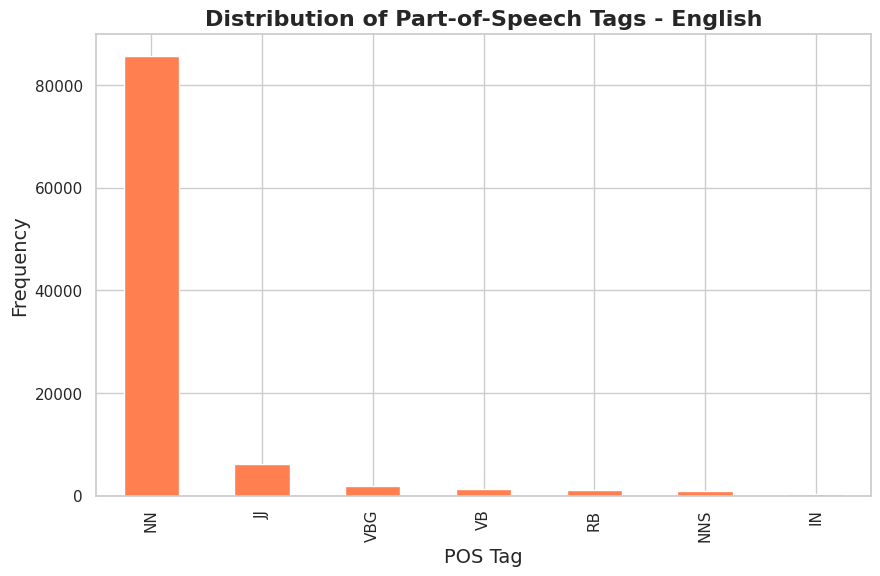

In [48]:
filtered_pos_counts = pos_counts[pos_counts > 200]
plt.figure(figsize=(10, 6))
filtered_pos_counts.plot.bar(color='coral')
plt.title('Distribution of Part-of-Speech Tags - English', fontsize=16, fontweight='bold')
plt.xlabel('POS Tag', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('Results/english_pos_plot.png', dpi=300, bbox_inches='tight')
plt.show()